In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../DATASET/spam.csv',encoding='latin-1')

In [5]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
df = df[['v1','v2']]
df.columns=["label","message"]
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df.drop_duplicates(keep="first")

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [13]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

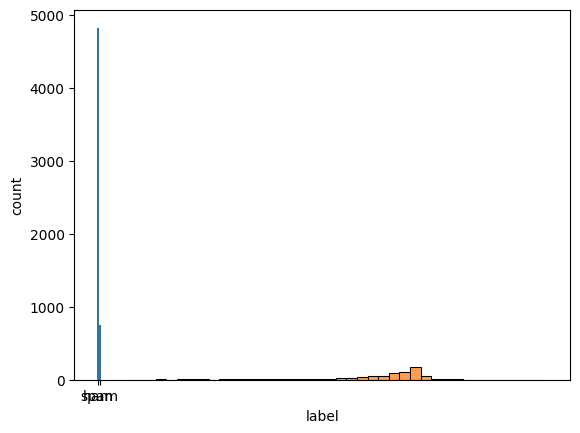

In [15]:
sns.countplot(x='label', data=df)
df['length'] = df['message'].apply(len)
sns.histplot(df[df['label']=='spam']['length'])

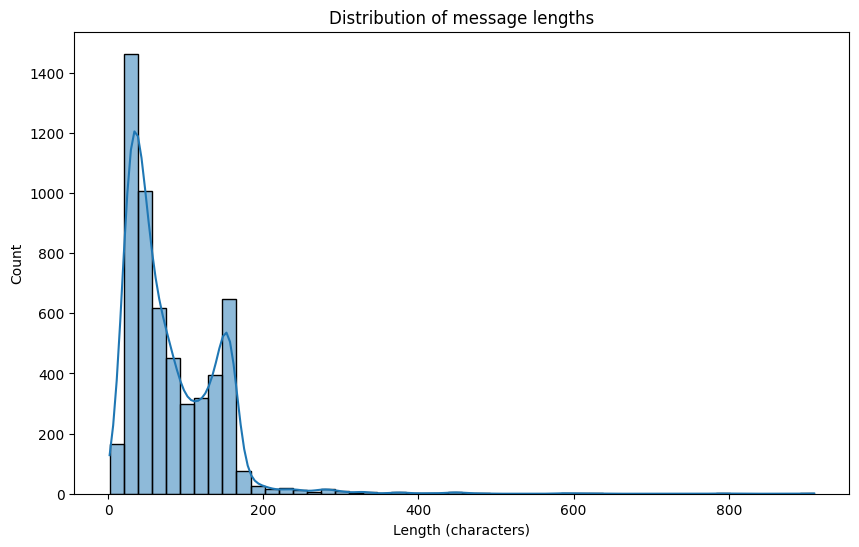

C:\Users\dyash\AppData\Local\Temp\ipykernel_25336\37545741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='length', data=df, palette='Set2')


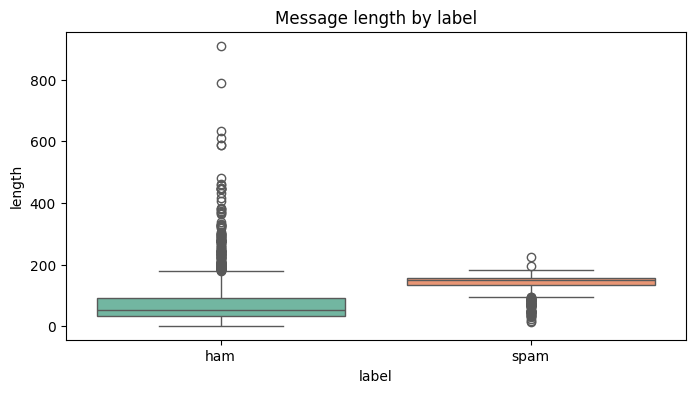

In [21]:
# Distribution of message lengths (histogram + KDE)
plt.figure(figsize=(10,6))
sns.histplot(df['length'], bins=50, kde=True, color='C0')
plt.title('Distribution of message lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()

# Boxplot of length by label (ham vs spam)
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='length', data=df, palette='Set2')
plt.title('Message length by label')
plt.show()

In [22]:

df['message'] = df['message'].astype(str)

df = df[df['message'].str.strip().astype(bool)].copy()



out_path = '../DATASET/cleaned_data.csv'
df.to_csv(out_path, index=False, encoding='utf-8')
print(f"Saved cleaned dataset to {out_path} — {len(df)} rows.")

Saved cleaned dataset to ../DATASET/cleaned_data.csv — 5572 rows.
